In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df['Species'] = iris.target

In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


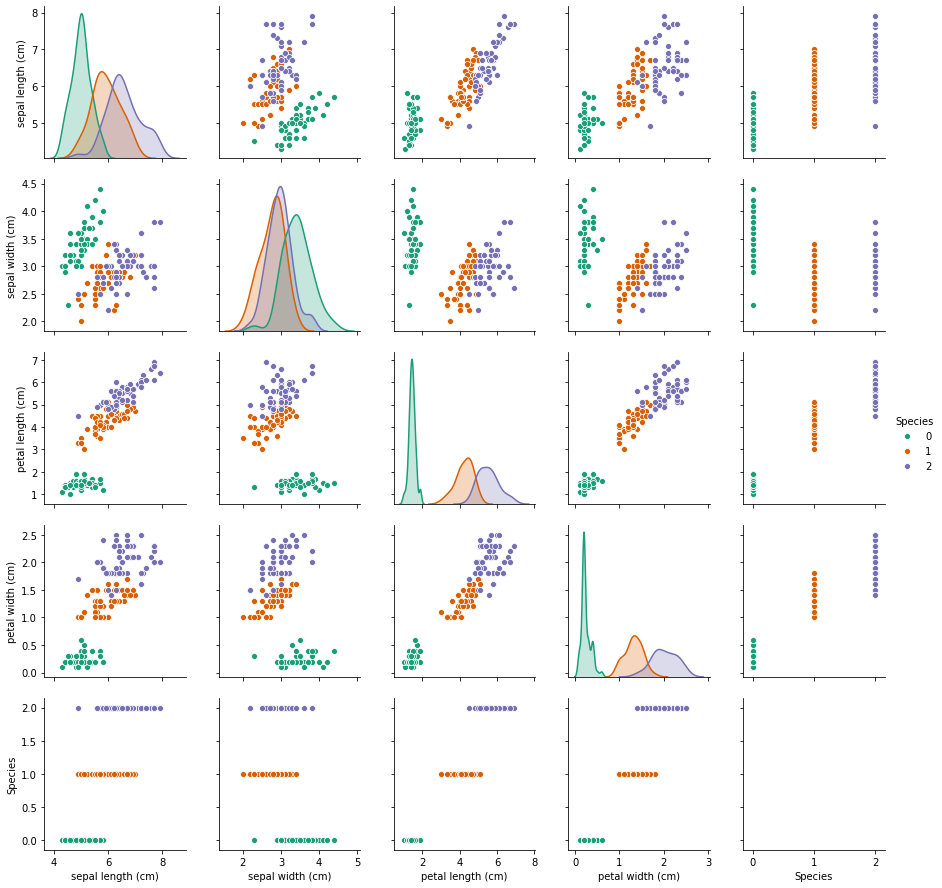

In [8]:
sns.pairplot(iris_df,height=2.5,diag_kind="kde",hue='Species',palette='Dark2')

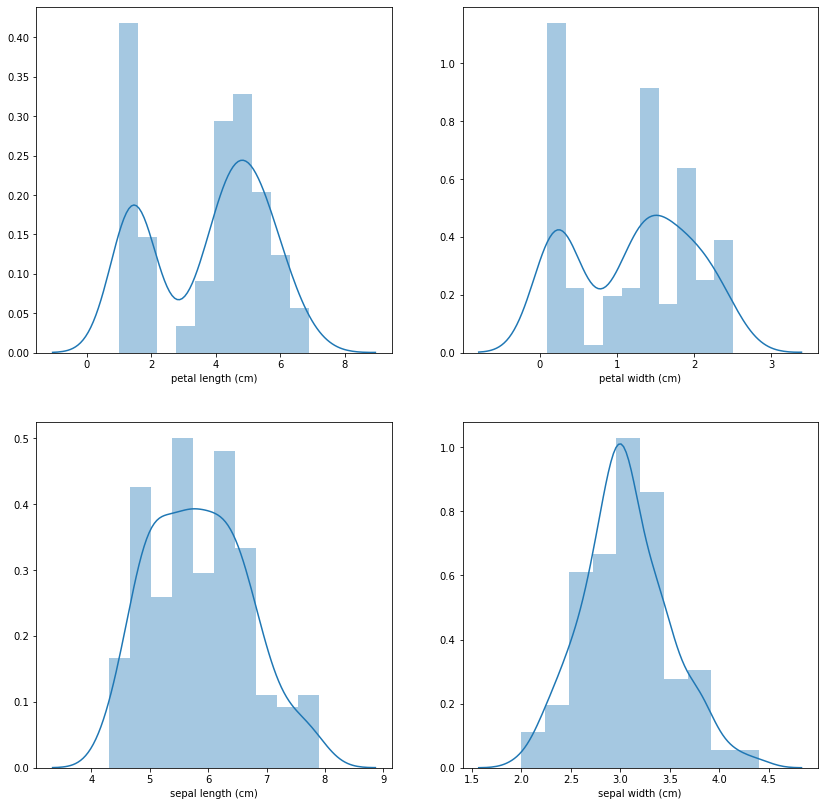

In [9]:
plt.figure(figsize=(14, 14))
binsize=10
plt.subplot(2,2,1)
sns.distplot(a=iris_df["petal length (cm)"], bins=binsize)
plt.subplot(2,2,2)
sns.distplot(a=iris_df["petal width (cm)"], bins=binsize)
plt.subplot(2,2,3)
sns.distplot(a=iris_df["sepal length (cm)"], bins=binsize)
plt.subplot(2,2,4)
sns.distplot(a=iris_df["sepal width (cm)"], bins=binsize)

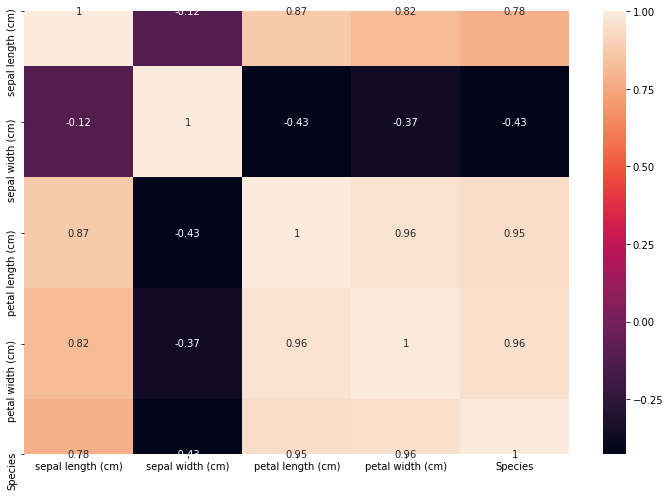

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(), annot = True)
plt.tight_layout()

In [12]:
x = iris_df.drop('Species', axis=1)
y = iris_df.Species

In [14]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)

print('\n')

print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (105, 4)
Shape of y_train: (105,)


Shape of x_test: (45, 4)
Shape of y_test: (45,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(random_state=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=4, splitter='best')

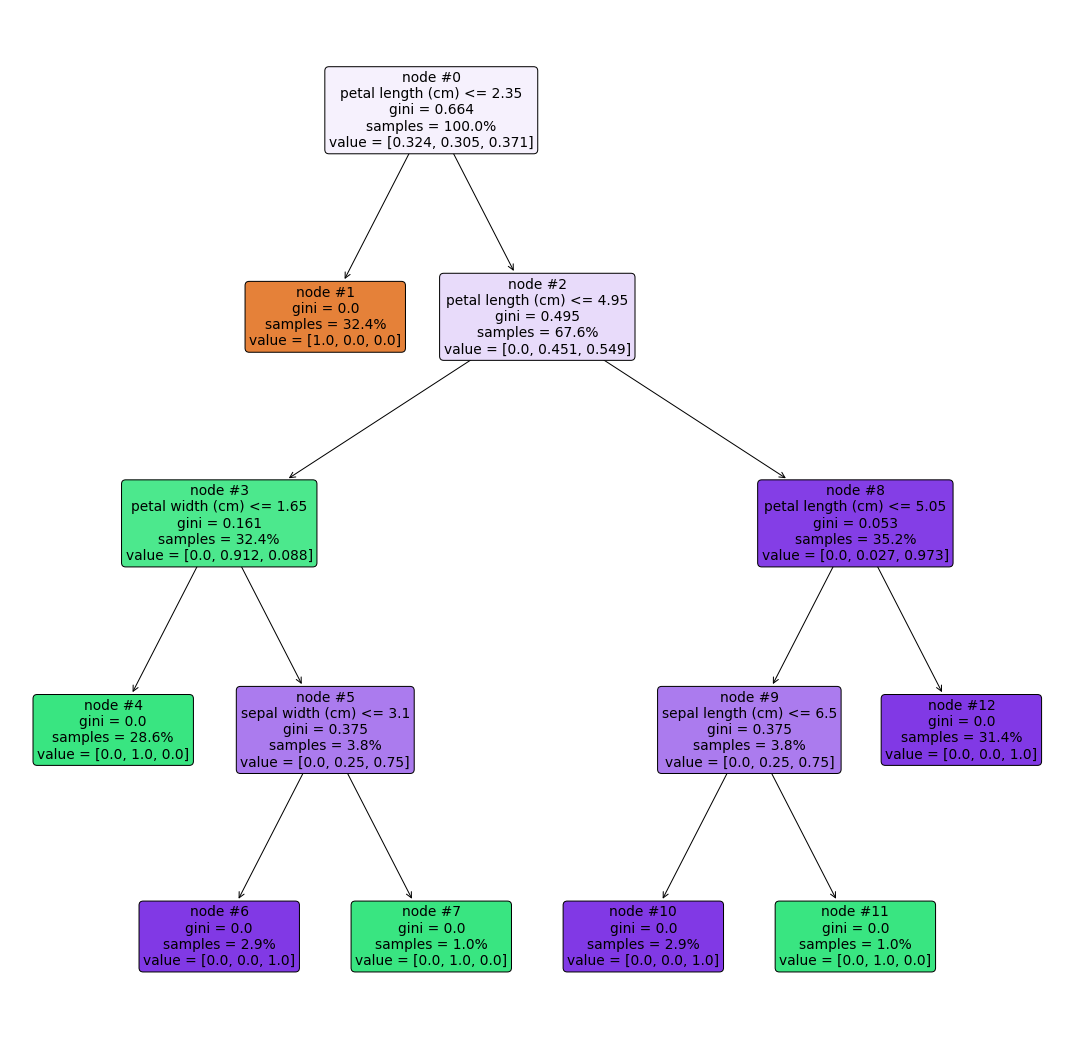

In [19]:
plt.figure(figsize = (19,19))
tree.plot_tree(dtree,filled=True,rounded=True,proportion=True,node_ids=True,feature_names=iris.feature_names)
plt.show()

In [20]:
predict=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy of the model is',accuracy_score(predict,y_test))
print('Classification Report of the model is',classification_report(predict,y_test))

Accuracy of the model is 0.9777777777777777
Classification Report of the model is               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

